<a href="https://colab.research.google.com/github/Deolinda1506/heptadev-challenge-mine-ai/blob/main/Heptadev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧪 1. Generate Mock Sensor Data

In [8]:
import pandas as pd
import numpy as np

def generate_mock_data(n_samples=1000, seed=42):
    np.random.seed(seed)
    data = {
        'timestamp': pd.date_range(start='2025-01-01', periods=n_samples, freq='min'),
        'gas_level': np.random.normal(50, 10, n_samples),
        'temperature': np.random.normal(30, 5, n_samples),
        'humidity': np.random.normal(60, 10, n_samples),
        'vibration': np.random.normal(0.5, 0.2, n_samples),
        'pressure': np.random.normal(1.0, 0.1, n_samples)
    }

    # Inject anomalies
    for i in range(0, n_samples, 200):
        data['gas_level'][i:i+5] += 50
        data['vibration'][i:i+5] += 1.5

    df = pd.DataFrame(data)
    df.to_csv('mock_sensor_data.csv', index=False)
    print("Mock data saved to 'mock_sensor_data.csv'")
    return df

df = generate_mock_data()
df.head()


Mock data saved to 'mock_sensor_data.csv'


,timestamp,gas_level,temperature,humidity,vibration,pressure
0,2025-01-01 00:00:00,104.967142,36.996777,53.248217,1.618438,0.913651
1,2025-01-01 00:01:00,98.617357,34.623168,58.554813,1.827923,0.996880
2,2025-01-01 00:02:00,106.476885,30.298152,52.075801,1.917279,1.001802
3,2025-01-01 00:03:00,115.230299,26.765316,56.920385,2.377538,1.047263
4,2025-01-01 00:04:00,97.658466,33.491117,41.063853,2.111311,0.863314


🤖 2. Train Anomaly Detection Model (ML Pipeline)

Model and scaler saved.


ExactExplainer explainer: 201it [00:10,  1.68it/s]                         


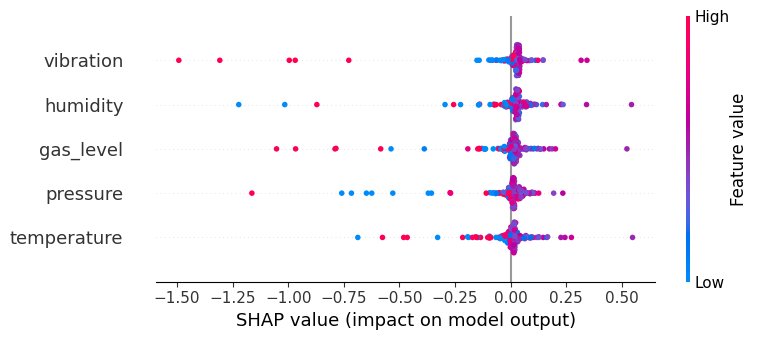

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import joblib
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

# Suppress FutureWarnings related to np.random.seed
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load mock data
data = pd.read_csv('mock_sensor_data.csv')
features = ['gas_level', 'temperature', 'humidity', 'vibration', 'pressure']
X_raw = data[features]

# Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Train model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_scaled)

# Save models
joblib.dump(model, 'anomaly_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved.")

# SHAP explainability (Optional, slow for large data)
explainer = shap.Explainer(model.predict, X_scaled[:200])
shap_values = explainer(X_scaled[:200])
shap.summary_plot(shap_values, X_scaled[:200], feature_names=features)

# Ensure plot is displayed
plt.show()


📊 3. Simulated UDEC-style Visualization

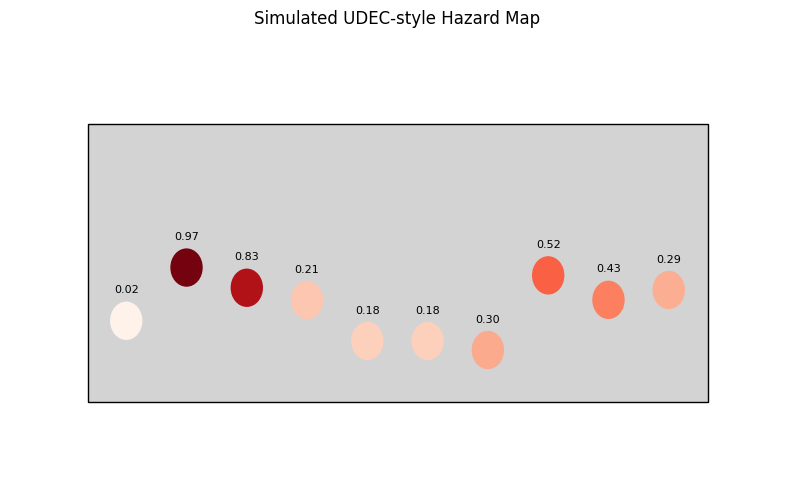

In [3]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))

# Draw tunnel area
tunnel = patches.Rectangle((1, 1), 8, 3, linewidth=1, edgecolor='black', facecolor='lightgrey')
ax.add_patch(tunnel)

# Simulated sensor locations with random risk values
np.random.seed(42)
xs = np.linspace(1.5, 8.5, 10)
ys = 2 + np.random.uniform(-0.5, 0.5, len(xs))
risks = np.random.rand(len(xs))

for x, y, risk in zip(xs, ys, risks):
    ax.add_patch(patches.Circle((x, y), 0.2, color=plt.cm.Reds(risk)))
    ax.text(x, y + 0.3, f"{risk:.2f}", ha='center', fontsize=8)

ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')
plt.title("Simulated UDEC-style Hazard Map")
plt.show()


🧭 3D Hazard Visualization in a Mine Tunnel


In [4]:
pip install plotly


In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Simulate 3D sensor positions
np.random.seed(42)
n_points = 50
x = np.random.uniform(0, 100, n_points)   # tunnel length
y = np.random.uniform(0, 10, n_points)    # tunnel width
z = np.random.uniform(-50, 0, n_points)   # depth below ground (negative)

# Simulate risk values (0 to 1)
risk = np.random.rand(n_points)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=risk,                # Color by risk
        colorscale='Reds',        # Red = more dangerous
        opacity=0.8,
        colorbar=dict(title='Risk Level')
    ),
    text=[f"Sensor {i+1}<br>Risk: {r:.2f}" for i, r in enumerate(risk)],
    hoverinfo='text'
)])

fig.update_layout(
    title="3D Visualization of Mine Tunnel Risk Zones",
    scene=dict(
        xaxis_title='Tunnel Length (m)',
        yaxis_title='Tunnel Width (m)',
        zaxis_title='Depth (m)',
        zaxis=dict(autorange='reversed')  # Depth should go downward
    ),
    height=600
)

fig.show()
